<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 45.8 MB/s 


In [2]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-btc", interval="minute30")
df

,open,high,low,close,volume,value
2021-12-17 08:45:00,59591000.0,59836000.0,59585000.0,59817000.0,91.668229,5.473639e+09
2021-12-17 09:00:00,59820000.0,60069000.0,59596000.0,60004000.0,246.418913,1.475517e+10
2021-12-17 09:15:00,60004000.0,60023000.0,59615000.0,59771000.0,172.903746,1.035203e+10
2021-12-17 09:30:00,59781000.0,60044000.0,59660000.0,59956000.0,151.421745,9.062274e+09
2021-12-17 09:45:00,59956000.0,59989000.0,59850000.0,59943000.0,120.948666,7.248844e+09
...,...,...,...,...,...,...
2021-12-19 09:30:00,58281000.0,58300000.0,58150000.0,58188000.0,81.530817,4.749246e+09
2021-12-19 09:45:00,58188000.0,58294000.0,58146000.0,58273000.0,52.008952,3.027382e+09
2021-12-19 10:00:00,58293000.0,58408000.0,58260000.0,58375000.0,61.132264,3.567316e+09
2021-12-19 10:15:00,58376000.0,58377000.0,58116000.0,58116000.0,81.763052,4.764738e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-12-17 08:45:00,59817000.0
1,2021-12-17 09:00:00,60004000.0
2,2021-12-17 09:15:00,59771000.0
3,2021-12-17 09:30:00,59956000.0
4,2021-12-17 09:45:00,59943000.0
...,...,...
195,2021-12-19 09:30:00,58188000.0
196,2021-12-19 09:45:00,58273000.0
197,2021-12-19 10:00:00,58375000.0
198,2021-12-19 10:15:00,58116000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

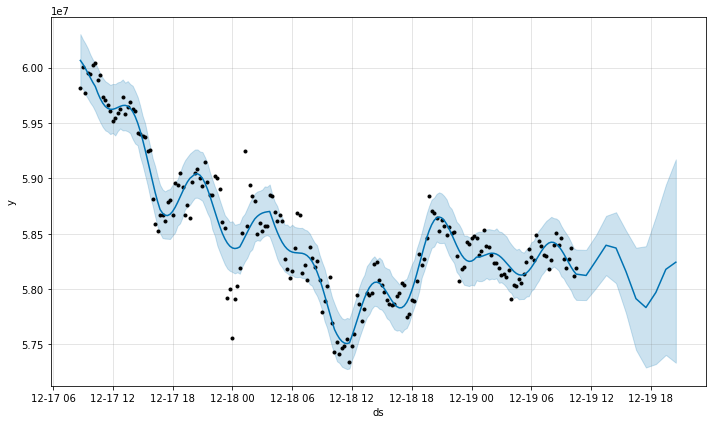

In [ ]:
#그래프1
fig1 = model.plot(forecast)

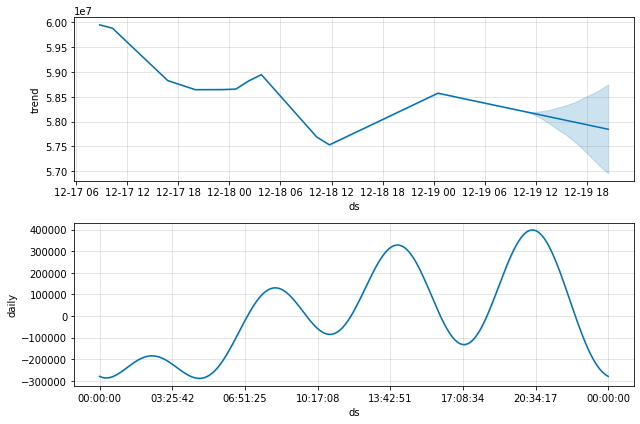

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)